<a href="https://colab.research.google.com/github/ninichang/py-and-fs/blob/master/ML_Assignment_3_Full_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from scipy import linalg
import numpy as np
import scipy.stats as stats

# Part 1: Full Bayesian Inference

 Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below: 

### 1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$

In [ ]:
X = np.linspace(0, 1, 50) ; Y = np.sin(X**2+1)
data = np.stack((X, Y), axis=-1) ; print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[0.         0.84147098]
 [0.02040816 0.84169594]
 [0.04081633 0.84236995]
 [0.06122449 0.84349036]
 [0.08163265 0.84505279]]


###  2. Add Gaussian random noise to the data 

In [ ]:
def add_noise(y_curve) :
    mu = 0 ; sigma = 0.05
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

Y_noise = add_noise(Y)

### 3. Show the original curve line and the noisy data. 

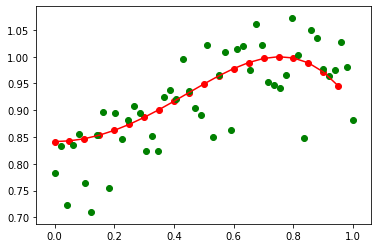

In [ ]:
# The red line is the original curve based on the equation. The green dots are the noisy data. 
X_coor = np.arange(0,1,0.05) ; Y_coor = np.sin(X_coor**2+1)
plt.scatter(X_coor, Y_coor, color="red")
plt.plot(X_coor, Y_coor, '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");

### 4. Compute w based on the full Bayesian inference (by using basis functions like discussed in class). 

In [ ]:
# Define the Gaussian basis function

def gaussian_basis(xn, mu, sigma):
    return np.exp(-((xn-mu)**2)/(2*sigma ** 2))

def full_bayesian(tn, xn, M, alpha, beta):
    
    big_phi = np.ones((len(xn), 1))
    sigma = (max(xn)- min(xn))/M
    
    for m_index in range(1, M):
        big_phi = np.c_[big_phi, gaussian_basis(X, sigma*m_index, sigma)]
        
    inversed_term = np.linalg.inv(np.dot(alpha, np.identity(M)) + np.matmul(big_phi.T, big_phi))
    
    beta_dot_inversed_term = np.dot(beta, inversed_term)
    
    all_dot_phi_transpose = np.matmul(beta_dot_inversed_term, big_phi.T)
    
    w = np.matmul(all_dot_phi_transpose, tn)
    
    predicted_y = np.matmul(big_phi, w.T)
    
    return w, predicted_y

w, predicted_y = full_bayesian(Y_noise, X, 4, 1, 1)

### 5. Display the estimated values of w 

In [ ]:
print('Estimated w: ', w)

Estimated w:  [0.65744101 0.13597592 0.02959469 0.30353538]


### 6. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results. 

Part 1.6: Changing alpha


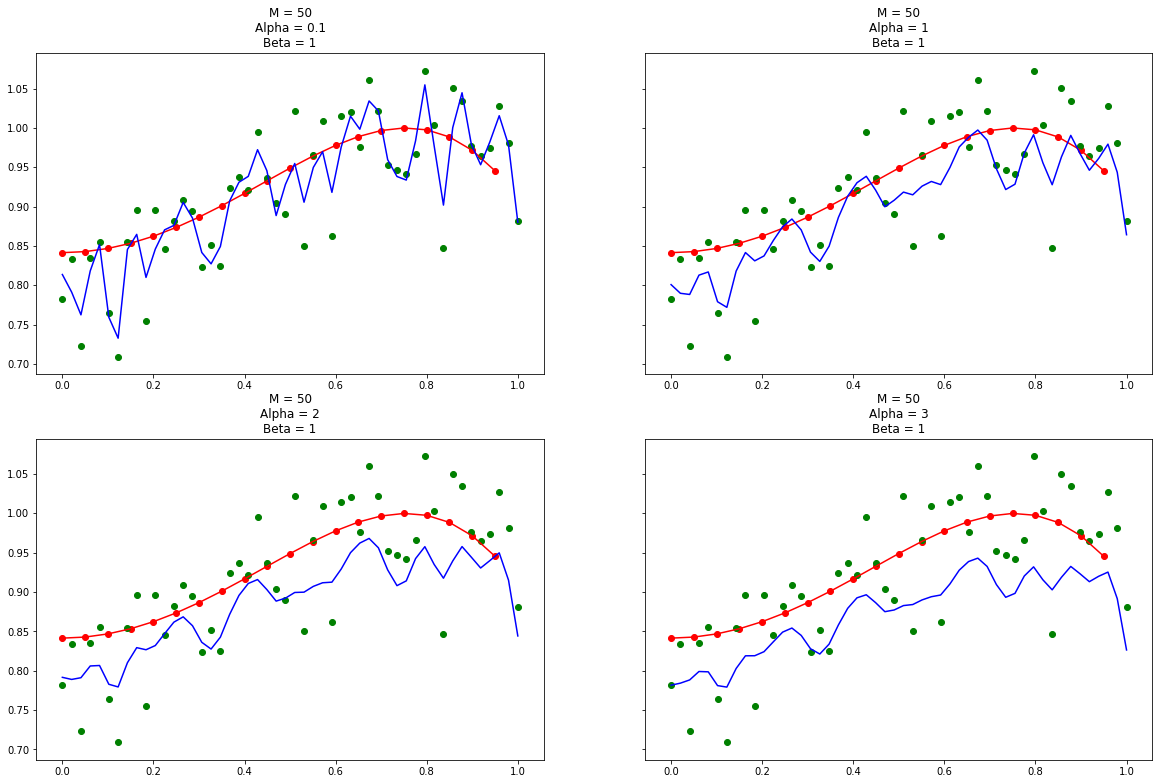

In [ ]:
print('Part 1.6: Changing alpha')

fig, axs = plt.subplots(2, 2, figsize=(20,13), sharey=True)
M = 50 ; alpha = 0.1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 0].scatter(X_coor, Y_coor, color="red")
axs[0, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 0].scatter(X, Y_noise, color="green");
axs[0, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 0].set_title(title);

M = 50 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 1].scatter(X_coor, Y_coor, color="red")
axs[0, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 1].scatter(X, Y_noise, color="green");
axs[0, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 1].set_title(title);

M = 50 ; alpha = 2 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 0].scatter(X_coor, Y_coor, color="red")
axs[1, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 0].scatter(X, Y_noise, color="green");
axs[1, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 0].set_title(title);


M = 50 ; alpha = 3 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 1].scatter(X_coor, Y_coor, color="red")
axs[1, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 1].scatter(X, Y_noise, color="green");
axs[1, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 1].set_title(title);


Part 1.6: Changing beta


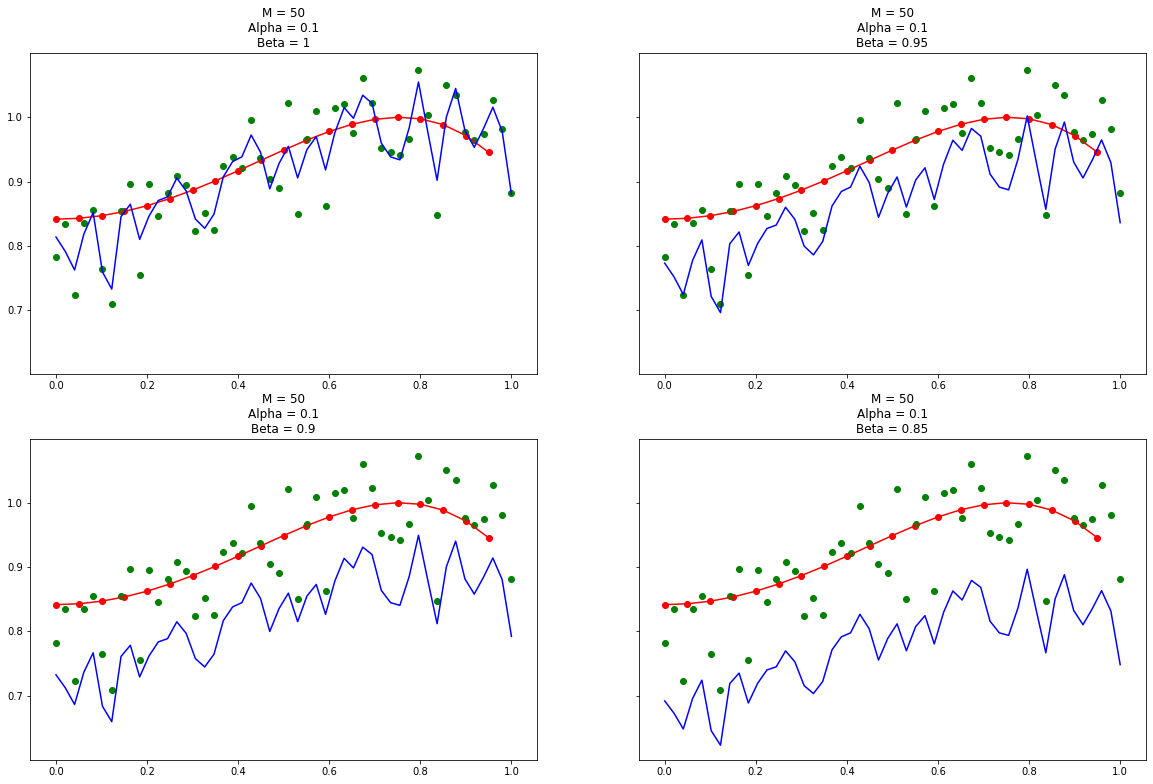

In [ ]:
print('Part 1.6: Changing beta')

fig, axs = plt.subplots(2, 2, figsize=(20,13), sharey=True)
M = 50 ; alpha = 0.1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 0].scatter(X_coor, Y_coor, color="red")
axs[0, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 0].scatter(X, Y_noise, color="green");
axs[0, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 0].set_title(title);

M = 50 ; alpha = 0.1 ; beta = 0.95

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 1].scatter(X_coor, Y_coor, color="red")
axs[0, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 1].scatter(X, Y_noise, color="green");
axs[0, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 1].set_title(title);

M = 50 ; alpha = 0.1 ; beta = 0.9

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 0].scatter(X_coor, Y_coor, color="red")
axs[1, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 0].scatter(X, Y_noise, color="green");
axs[1, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 0].set_title(title);


M = 50 ; alpha = 0.1 ; beta = 0.85

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 1].scatter(X_coor, Y_coor, color="red")
axs[1, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 1].scatter(X, Y_noise, color="green");
axs[1, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 1].set_title(title);


From the results of changing alpha and beta above, we see that larger alpha reduces overfitting. As alpha is a regularization parameter, alpha helps us simplify the model.

### 7. Show your best fitting: 

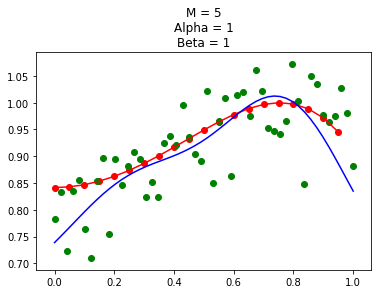

In [ ]:
M = 5 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)

plt.scatter(X_coor, Y_coor, color="red") ; plt.plot(X_coor, Y_coor, '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green"); plt.plot(X, predicted_y, '-g', label='function', color="blue");

title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta)
plt.title(title);

### 8. Increase the value of M, and discuss how it affects the prediction (curve fitting) and the uncertainty of the prediction. 

Part 1.8: Changing M


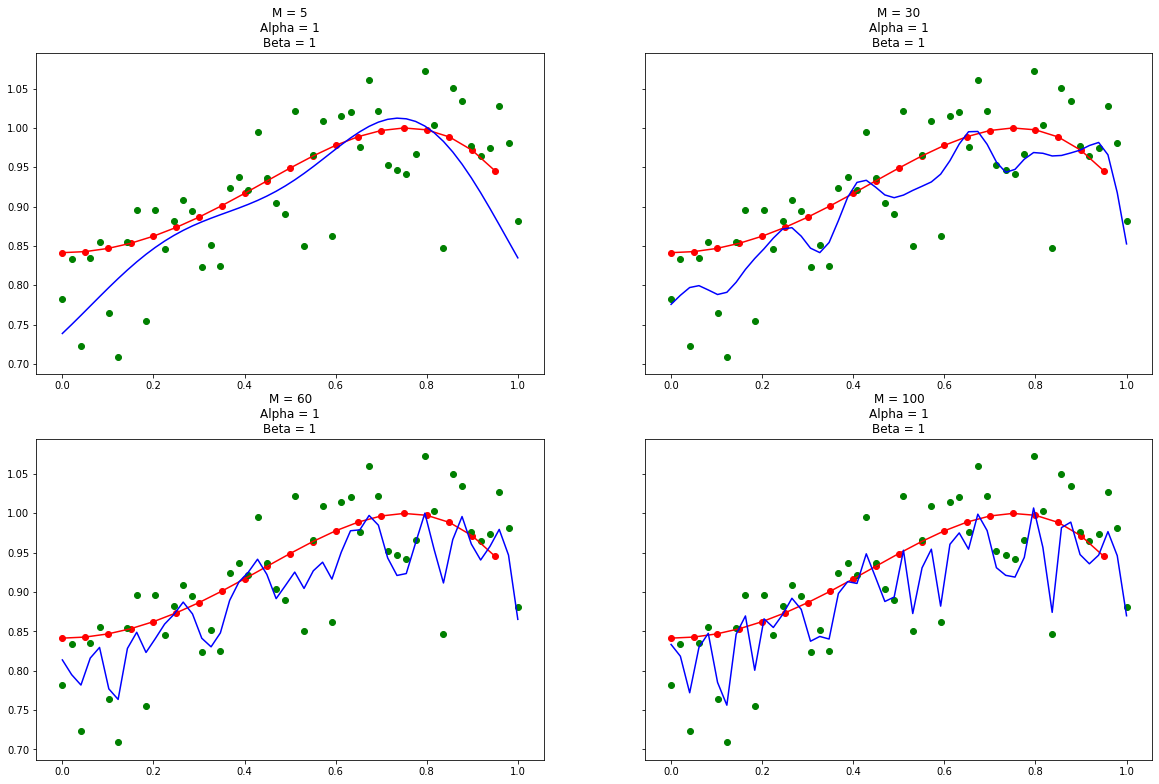

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,13), sharey=True)
print('Part 1.8: Changing M')

M = 5 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 0].scatter(X_coor, Y_coor, color="red")
axs[0, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 0].scatter(X, Y_noise, color="green");
axs[0, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 0].set_title(title);

M = 30 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[0, 1].scatter(X_coor, Y_coor, color="red")
axs[0, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[0, 1].scatter(X, Y_noise, color="green");
axs[0, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[0, 1].set_title(title);

M = 60 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 0].scatter(X_coor, Y_coor, color="red")
axs[1, 0].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 0].scatter(X, Y_noise, color="green");
axs[1, 0].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 0].set_title(title);


M = 100 ; alpha = 1 ; beta = 1

w, predicted_y = full_bayesian(Y_noise, X, M, alpha, beta)
axs[1, 1].scatter(X_coor, Y_coor, color="red")
axs[1, 1].plot(X_coor, Y_coor, '-g', label='function', color="red")
axs[1, 1].scatter(X, Y_noise, color="green");
axs[1, 1].plot(X, predicted_y, '-g', label='function', color="blue"); title = 'M = '+ str(M) + '\nAlpha = '+ str(alpha) + '\nBeta = '+ str(beta) 
axs[1, 1].set_title(title);


Larger M means more overfitting as the curve gets increasingly similar to the exact distribution of the data points. The uncertainty of prediction increases as M increases.

### 9. Explain how useful p(w|t) is for the training and testing stages. 

p(w|t) is useful because it allows us to assess the probability that the model accurately capstures the underlying trend of the data given the observed data so far. With p(w|t), we know how much we can trust the model. 

# Part 2: Sequential Bayesian Learning

 Write a program in python to implement sequential Bayesian learning to solve the curve fitting problem. Follow the instructions below: 

### 1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$

In [ ]:
X = np.linspace(0, 1, 50) ; Y = np.sin(X**2+1)
data = np.stack((X, Y), axis=-1) ; print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[0.         0.84147098]
 [0.02040816 0.84169594]
 [0.04081633 0.84236995]
 [0.06122449 0.84349036]
 [0.08163265 0.84505279]]


###  2. Add Gaussian random noise to the data 

In [ ]:
Y_noise = add_noise(Y)


### 3. Fit the generated noisy data sequentially (5 data for each sequence).

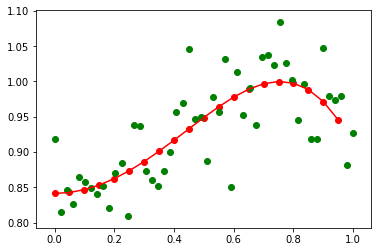

In [ ]:
# The red line is the original curve based on the equation. The green dots are the noisy data. 
X_coor = np.arange(0,1,0.05) ; Y_coor = np.sin(X_coor**2+1)
plt.scatter(X_coor, Y_coor, color="red")
plt.plot(X_coor, Y_coor, '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");

In [ ]:
def seq_learn(tn, xn, M, alpha, beta):
    
    # Array to store the predicted ys
    predicted_ys = [] ; data_per_seq = 5 ; mn_s = [] ; sn_inv_s = []
    
    # Round to the nearest 5. This number is the total number of iterations needed
    for round_index in np.arange(1, int(round(len(xn)/data_per_seq)+1)):

        xs = xn[0: round_index*data_per_seq] 
        ts = np.reshape(tn[0: round_index*data_per_seq], (len(tn[0: round_index*data_per_seq]), 1))

        big_phi = np.ones((len(xs), 1)) ; sigma = (max(xn)- min(xn))/M # The first column of big phi should be 1
        
        for m_index in range(1, M):
            big_phi = np.c_[big_phi, gaussian_basis(xs, sigma*(m_index), sigma)]

        inversed_term = np.linalg.inv(np.dot(alpha, np.identity(M)) + np.matmul(big_phi.T, big_phi))
        beta_dot_inversed_term = np.dot(beta, inversed_term)
        all_dot_phi_transpose = np.matmul(beta_dot_inversed_term, big_phi.T)
        w = np.matmul(all_dot_phi_transpose, ts)

        predicted_y = np.matmul(big_phi, w)
        big_phi_for_fitting = np.ones((len(xn), 1))

        for m_index in range(1, M):
            big_phi_for_fitting = np.c_[big_phi_for_fitting, gaussian_basis(xn, sigma*m_index, sigma)]        

        predicted_ys.append(np.matmul(big_phi_for_fitting, w))
        
    return predicted_ys

predicted_ys = seq_learn(Y_noise, X, 4, 1, 1)

In [ ]:
def seq_learn(tn, xn, M, alpha, beta):
    
    # Array to store the predicted ys
    predicted_ys = [] ; data_per_seq = 5 ; mn_s = [] ; sn_s = []
    mn_s.append(np.zeros((M, 1)))
    sn_s.append(np.dot(1/alpha, np.identity(M)))

    # Round to the nearest 5. This number is the total number of iterations needed
    for round_index in np.arange(1, int(round(len(xn)/data_per_seq)+1)):
        
        xs = xn[0: round_index*data_per_seq] 
        ts = np.reshape(tn[0: round_index*data_per_seq], (len(tn[0: round_index*data_per_seq]), 1))

        big_phi = np.ones((len(xs), 1)) ; sigma = (max(xn)- min(xn))/M 
        
        for m_index in range(1, M):
            big_phi = np.c_[big_phi, gaussian_basis(xs, sigma*(m_index), sigma)]
        
        ind = round_index - 1        
        sn = np.linalg.inv(np.linalg.inv(sn_s[round_index-1]) + np.dot(beta, np.dot(big_phi.T, big_phi)))
        mn = np.dot(sn, np.dot(np.linalg.inv(sn_s[ind]), mn_s[ind]) + np.dot(beta, np.dot(big_phi.T, ts)))
        
        mn_s.append(mn)
        sn_s.append(sn)
        
    
        big_phi_for_fitting = np.ones((len(xn), 1))
        for m_index in range(1, M):
            big_phi_for_fitting = np.c_[big_phi_for_fitting, gaussian_basis(xn, sigma*m_index, sigma)]        

        predicted_ys.append(np.matmul(big_phi_for_fitting, mn))
        
    return predicted_ys

### 4.  Show your best result for each sequence. The below examples are only some of them, but in your submission, you have to show all. 

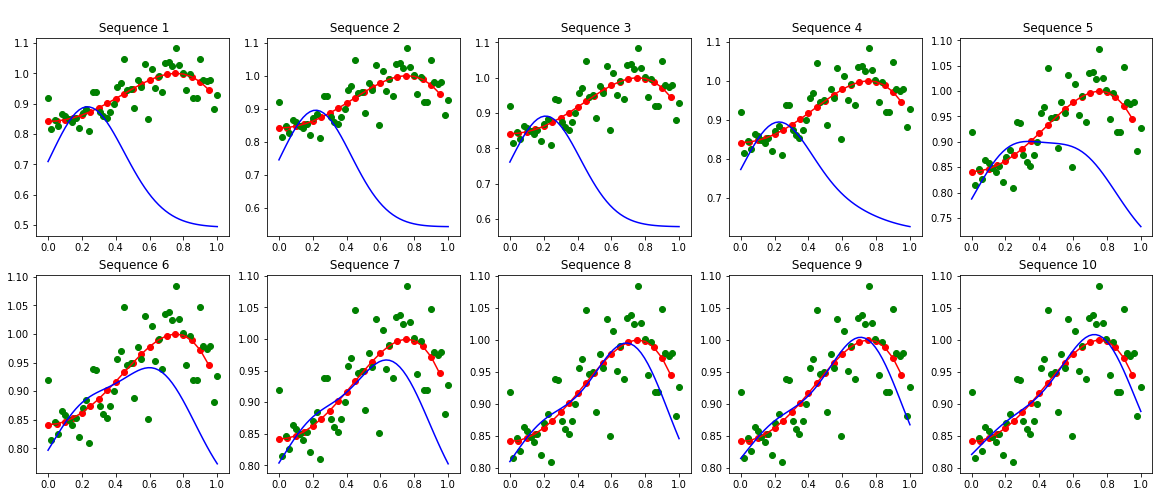

In [ ]:
M = 5 ; predicted_ys = seq_learn(Y_noise, X, M, 1, 1)

fig, axs = plt.subplots(2, 5, figsize=(20,8))

for i in range(0, 10):
    if i < 5:
        axs[0, i].scatter(X_coor, Y_coor, color="red")
        axs[0, i].plot(X_coor, Y_coor, '-g', label='function', color="red")
        axs[0, i].scatter(X, Y_noise, color="green")
        axs[0, i].plot(X, predicted_ys[i], '-g', label='function', color="blue")
        title = '\n Sequence ' + str(i+1)
        axs[0, i].set_title(title)
    else:
        axs[1, i-5].scatter(X_coor, Y_coor, color="red")
        axs[1, i-5].plot(X_coor, Y_coor, '-g', label='function', color="red")
        axs[1, i-5].scatter(X, Y_noise, color="green")
        axs[1, i-5].plot(X, predicted_ys[i], '-g', label='function', color="blue")
        title = '\n Sequence ' + str(i+1)
        axs[1, i-5].set_title(title)


### 5.  Discuss how to set M and the basis function's parameters in sequential learning. 

When M is set high, the model tends to overfit. However, when M is set too low, the model will significantly underfit. 
As new data comes in, we need to use the range of the data to determine the suitable M. However, M is fixed in the beginning so we need to start with an M based on our best guess of the data, which is the problem we face in sequential learning. Generally, we prefer to set M higher because we can use increase alpha to regularized the model. If we set M too low, an overly simply model cannot be changed. 

# Part 3: Predictive Distribution

Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below: 

### 1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$

In [ ]:
X = np.linspace(0, 1, 50) ; Y = np.sin(X**2+1)
data = np.stack((X, Y), axis=-1) ; print('First 5 rows of generated data:\n', data[0:5])

First 5 rows of generated data:
 [[0.         0.84147098]
 [0.02040816 0.84169594]
 [0.04081633 0.84236995]
 [0.06122449 0.84349036]
 [0.08163265 0.84505279]]


###  2. Add Gaussian random noise to the data 

In [ ]:
Y_noise = add_noise(Y)


### 3.  Show the original curve line and the noisy data. 

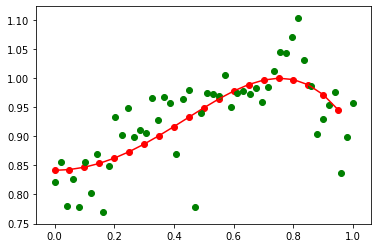

In [ ]:
# The red line is the original curve based on the equation. The green dots are the noisy data. 
X_coor = np.arange(0,1,0.05) ; Y_coor = np.sin(X_coor**2+1)
plt.scatter(X_coor, Y_coor, color="red") ; plt.plot(X_coor, Y_coor, '-g', label='function', color="red")
plt.scatter(X, Y_noise, color="green");

### 4.  Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. 

In [ ]:
def pred_dist(xn, tn, M, alpha, beta):     
    
    chosen_x = [] ; chosen_x_index = [] ; xn_copy = xn 
    sn_s = [np.dot(1/alpha, np.identity(M))] ; mn_s = [np.zeros((M, 1))] ; 
    
    for round_index in range(len(xn)):
        s_stars = []
        m_stars = []
        x_star = np.random.choice(xn_copy) ; chosen_x.append(x_star)
        chosen_x_index.append(int(np.where(xn == x_star)[0])) ; 
        xn_copy = np.delete(xn_copy, np.where(xn_copy == x_star)) 

        xs = np.reshape(xn[chosen_x_index], (len(xn[chosen_x_index]), 1))
        ts = np.reshape(tn[chosen_x_index], (len(tn[chosen_x_index]), 1))

        big_phi = np.ones((len(xs), 1)) ; sigma = (max(xn)- min(xn)+0.0001)/M
        for m_index in range(1, M):
            big_phi = np.c_[big_phi, gaussian_basis(xs, sigma*m_index, sigma)]

        ind = round_index - 1        
        sn = np.linalg.inv(np.linalg.inv(sn_s[ind]) + np.dot(beta, np.dot(big_phi.T, big_phi)))
        mn = np.dot(sn, np.dot(np.linalg.inv(sn_s[ind]), mn_s[ind]) + np.dot(beta, np.dot(big_phi.T, ts)))       

        for k in range(len(xn)):
            phi_x = np.ones((1, 1)) 
            for m_index in range(1, M):
                phi_x = np.c_[phi_x, gaussian_basis(xn[k], sigma*m_index, sigma)]
            m_star = np.dot(mn.T, phi_x.T)     # The predicted y = m star
            m_stars.append(float(m_star))
            s_star = 1/beta + np.matmul(np.matmul(phi_x, sn), phi_x.T)
            s_stars.append(float(s_star))
            mn_s.append(mn); sn_s.append(sn) 
            
    return m_stars, s_stars

### 5.  Experiment with your code by changing beta, and explain what beta is for and how it affects the results. 

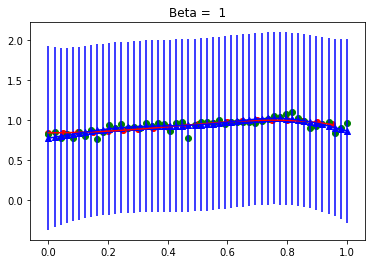

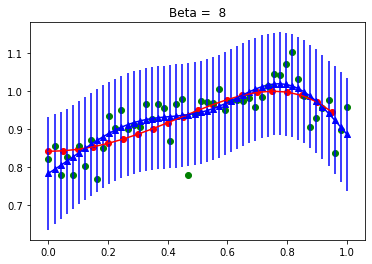

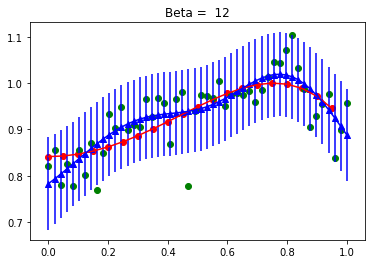

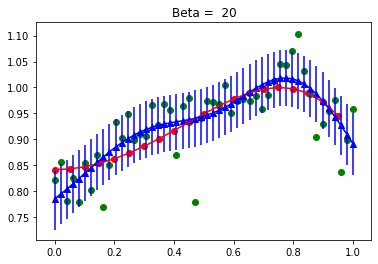

In [ ]:
beta = [1, 8, 12, 20]

for i in range(len(beta)):
    m_stars, s_stars = pred_dist(X, Y_noise, 5, 0.2, beta[i])
    plt.scatter(X_coor, Y_coor, color="red")
    plt.plot(X_coor, Y_coor, '-g', label='function', color="red")
    plt.scatter(X, Y_noise, color="green");
    title = 'Beta =  ' + str(beta[i])
    plt.title(title);
    plt.errorbar(X, m_stars, s_stars, color="blue")
    plt.scatter(X, m_stars, marker='^', color = 'blue');
    if i != len(beta) - 1:
        plt.subplots(1, 1)

When beta increases, s star decreases as 1 over beta is part of the equation of s star. Therefore, the width of the interval of the error bars decreases as beta increases.

### 6.   Show your best prediction results for all 50 data one by one: 

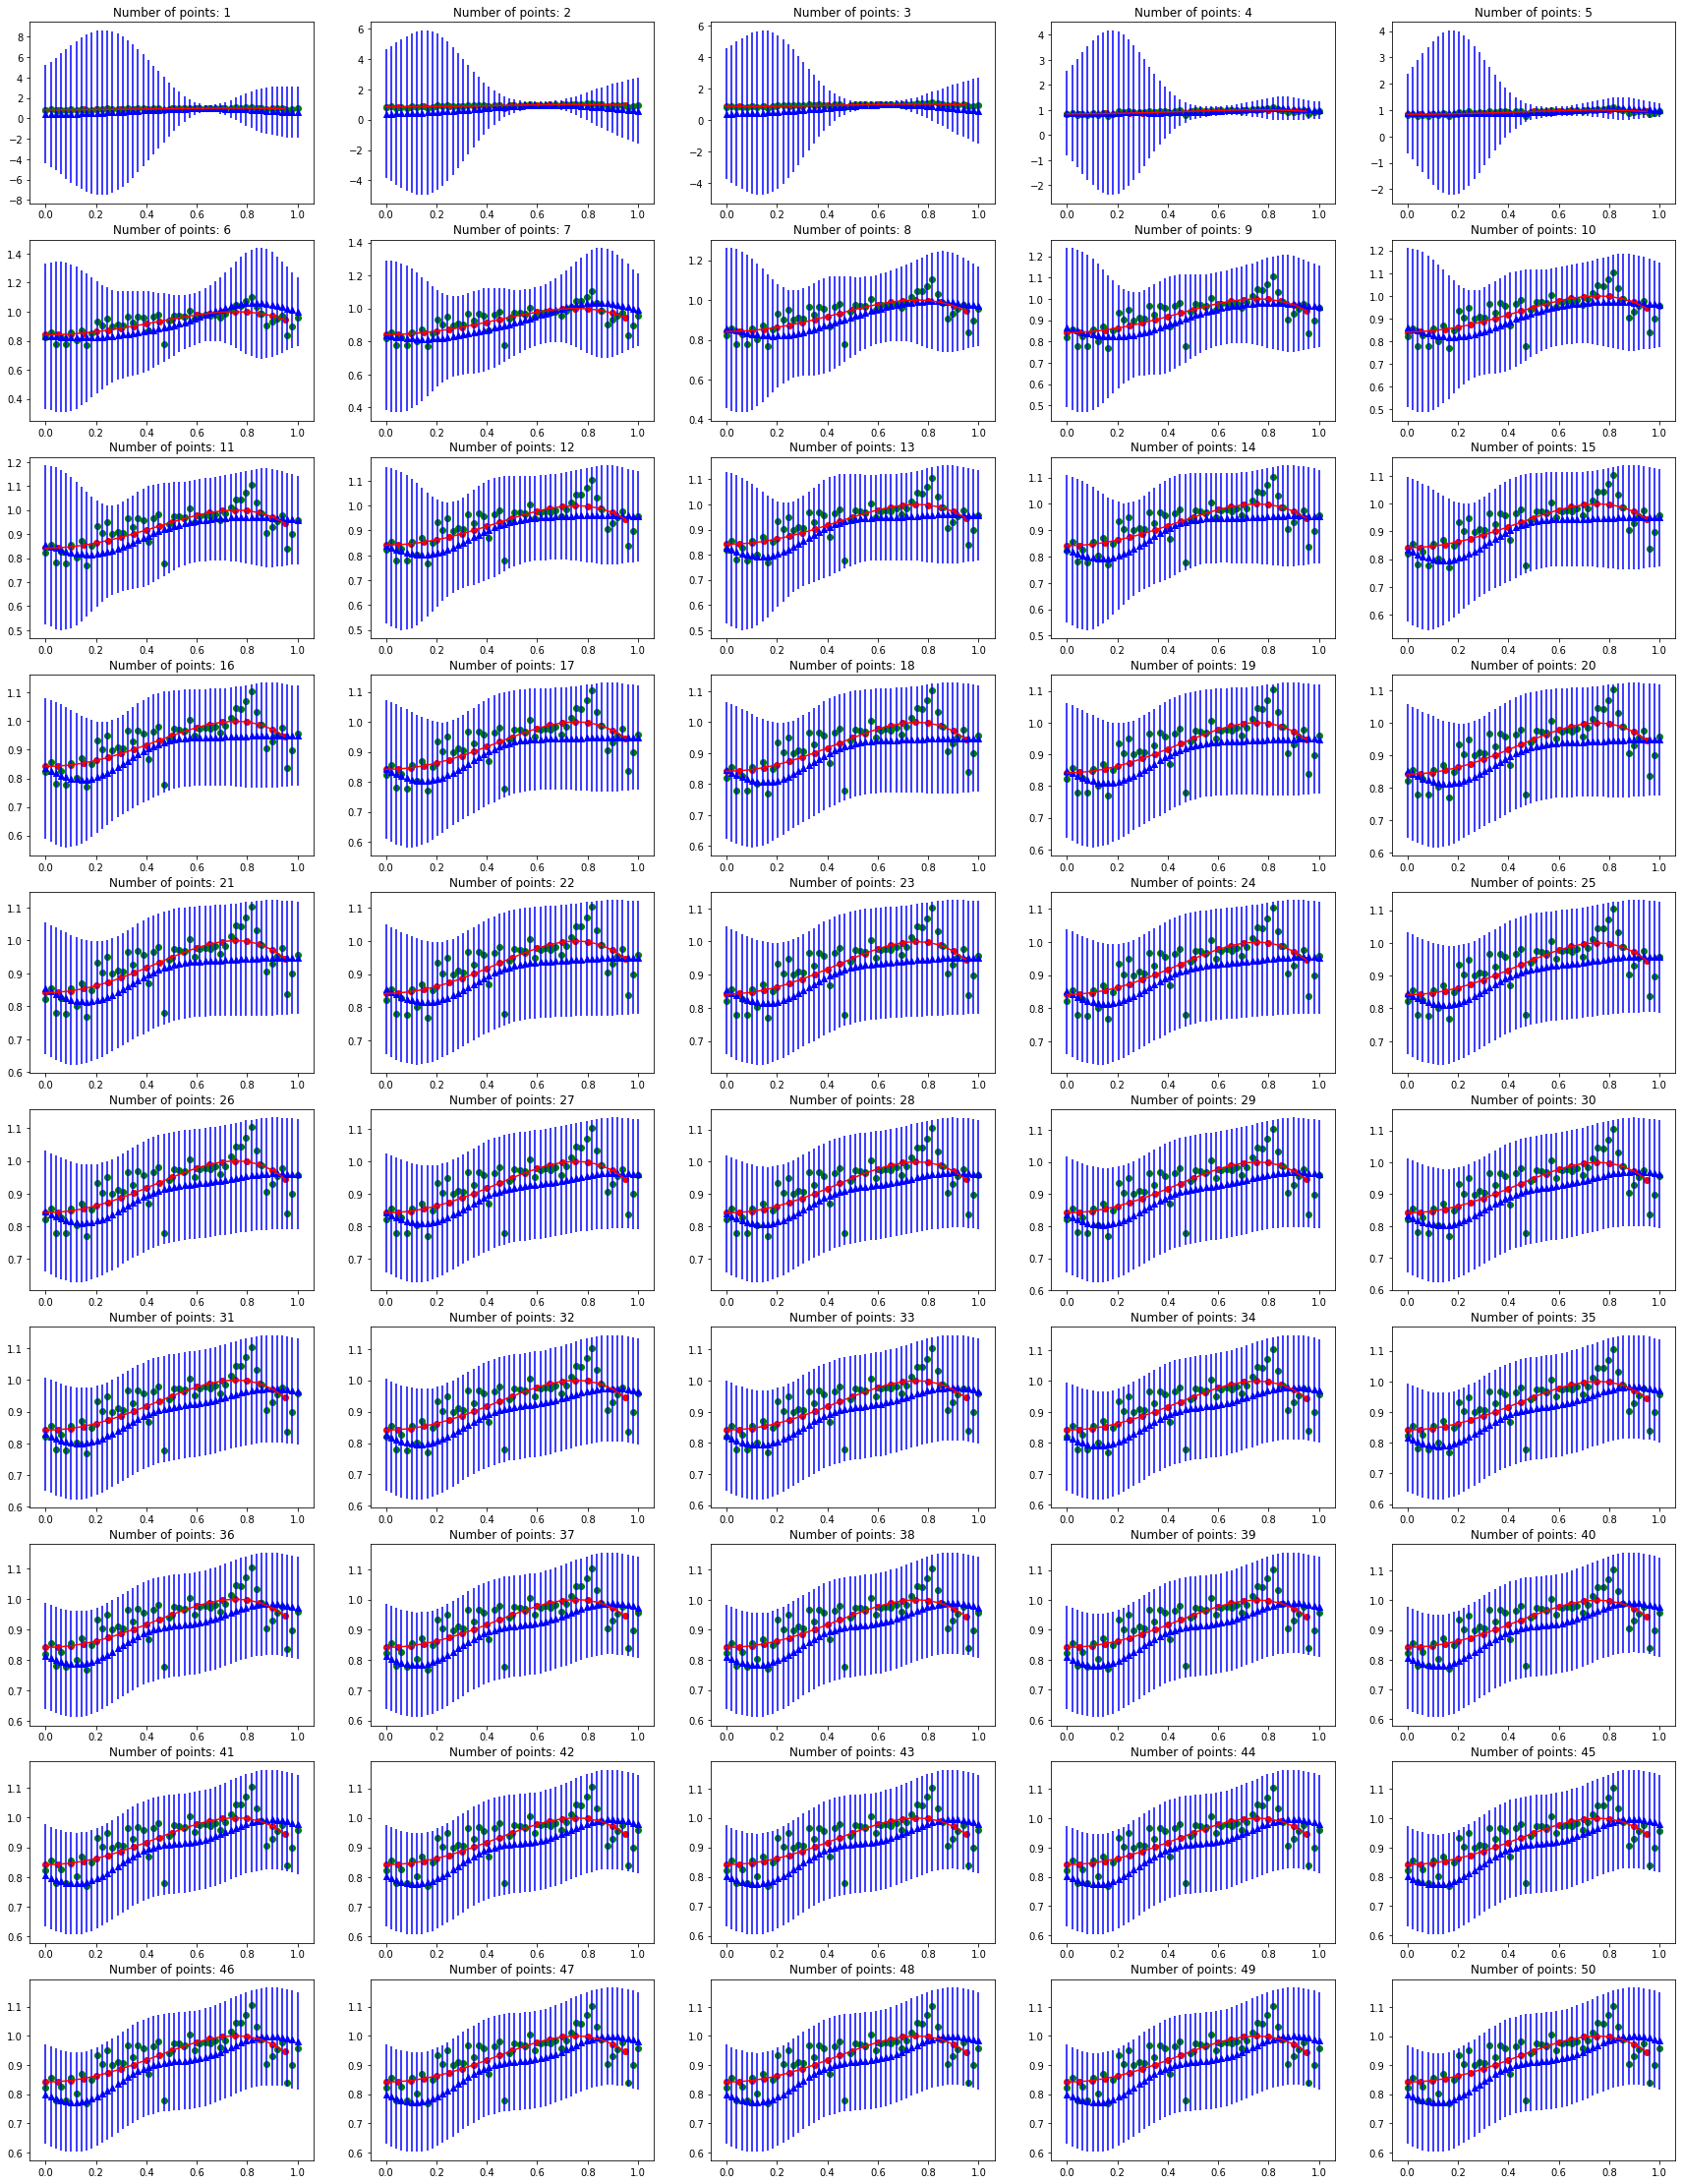

In [ ]:
def pred_dist(xn, tn, M, alpha, beta):     
    ncol = 5 ; nrow = int(50/ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize=(30, 40))    
    
    round_index = 1 ; chosen_x = [] ; chosen_x_index = [] ; xn_copy = xn

    sn_s = [np.dot(1/alpha, np.identity(M))] ; mn_s = [np.zeros((M, 1))]      # Array to store sn and mn

    for nrow_i in range(nrow):
        for ncol_j in range(ncol):            

            x_star = np.random.choice(xn_copy) ; chosen_x.append(x_star)
            chosen_x_index.append(int(np.where(xn == x_star)[0])) ; 
            xn_copy = np.delete(xn_copy, np.where(xn_copy == x_star)) 

            xs = np.reshape(xn[chosen_x_index], (len(xn[chosen_x_index]), 1))
            ts = np.reshape(tn[chosen_x_index], (len(tn[chosen_x_index]), 1))

            big_phi = np.ones((len(xs), 1)) ; sigma = (max(xn)- min(xn)+0.001)/M
            for m_index in range(1, M):
                big_phi = np.c_[big_phi, gaussian_basis(xs, sigma*(m_index-1), sigma)]

            ind = round_index - 1        
            sn = np.linalg.inv(np.linalg.inv(sn_s[ind]) + np.dot(beta, np.dot(big_phi.T, big_phi)))
            mn = np.dot(sn, np.dot(np.linalg.inv(sn_s[ind]), mn_s[ind]) + np.dot(beta, np.dot(big_phi.T, ts)))

            axs[nrow_i, ncol_j].scatter(X_coor, Y_coor, color="red")
            axs[nrow_i, ncol_j].plot(X_coor, Y_coor, '-g', label='function', color="red")
            axs[nrow_i, ncol_j].scatter(X, Y_noise, color="green");
            title = 'Number of points: ' + str(len(chosen_x_index)); axs[nrow_i, ncol_j].set_title(title)   
            
            sstar = []
            for k in range(len(xn)):

                phi_x = np.ones((1, 1)) 
                for m_index in range(1, M):
                    phi_x = np.c_[phi_x, gaussian_basis(xn[k], sigma*m_index, sigma)]

                m_star = np.dot(mn.T, phi_x.T)     # The predicted y = m star
                s_star = 1/beta + np.matmul(np.matmul(phi_x, sn), phi_x.T)
                axs[nrow_i, ncol_j].errorbar(xn[k], m_star, float(s_star), color="blue")
                axs[nrow_i, ncol_j].scatter(xn[k], m_star, marker='^', color = 'blue')
                sstar.append(s_star)
                                    
            round_index = round_index + 1    
            mn_s.append(mn); sn_s.append(sn)            
    
pred_dist(X, Y_noise, 5, 0.2, 6) # The error bars are one standard deviation away from the mean of your prediction

### 7.   Explain why the predictive distribution is better than the original form of the full Bayesian inference (part I)

Predictive distribution gives us the whole distribution of the predicted ys, so we have a holistic picture of the uncertainty of our predicted values given the observed data.

### 8.   Discuss the differences between p(t_new|t) and p(w|t). 

p(w|t) is the probability that the model accurately captures the underlying distribution given the observed data, whereas p(t_new|t) is the probability that the prediction belongs to the distribution given the observed true values so far. Our end goal is to predicted t_new given the observed data, so the parameters w are part of our bigger goal of predicting the new_t. Therefore, p(t_new|t) is much more useful than p(w|t) because p(t_new|t) directy gives us the uncertainty of our predicted value. 